**LAB ASSIGNMENT 3 - TOPIC MODELING USING LDA**

**ADITI KRISHNA PRIYA MANIKANTAN**

**1230651112**

**26/01/2023**

In [ ]:
from gensim import corpora
from gensim import models
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import spacy.cli;
spacy.cli.download("en_core_web_lg");

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
data = pd.read_csv('restaurant_reviews_az.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",1/27/2020 22:59,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,4/19/2020 5:33,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2/29/2020 19:43,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,3/14/2020 21:47,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",1/17/2020 20:32,1


In [ ]:
nlp = spacy.load("en_core_web_lg")
documents = []
for index, row in data.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(corpus_tfidf[2])

[(1, 0.06432163341549128), (35, 0.09467425692769393), (93, 0.1906880782147724), (94, 0.184707641835784), (95, 0.1640370968769277), (96, 0.1388295185310493), (97, 0.2962858332346956), (98, 0.21946769967510463), (99, 0.11052819882867163), (100, 0.2539004303060642), (101, 0.22771459322555168), (102, 0.17846495136142226), (103, 0.12331967817740434), (104, 0.2954878461482439), (105, 0.2949623163533192), (106, 0.2952244434693993), (107, 0.3412634103917746), (108, 0.05958512469535246), (109, 0.09531912688557592), (110, 0.1445910794068106), (111, 0.22385439097606621), (112, 0.11138394436277957), (113, 0.13521202950878788), (114, 0.14129613572741617), (115, 0.21553043543075215)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.013*"scone" + 0.006*"Cold" + 0.006*"queso" + 0.006*"Guero" + 0.006*"Canelo"')
(1, '0.006*"neighborhood" + 0.005*"consistently" + 0.005*"DoorDash" + 0.005*"bang" + 0.004*"gyro"')
(2, '0.008*"order" + 0.007*"t" + 0.007*"," + 0.006*"wait" + 0.005*"minute"')
(3, '0.007*"Sahuarita" + 0.007*"Bisbee" + 0.006*"Club" + 0.005*"Breakfast" + 0.005*"banh"')
(4, '0.009*"," + 0.008*"great" + 0.007*"good" + 0.006*"place" + 0.006*"food"')
(5, '0.010*"Birria" + 0.006*"pizza" + 0.005*"peanut" + 0.004*"best" + 0.004*"Chile"')
(6, '0.010*"courtyard" + 0.007*"dime" + 0.006*"Nate" + 0.006*"calzone" + 0.006*"habanero"')
(7, '0.007*"Thai" + 0.007*"shake" + 0.006*"pho" + 0.006*"tot" + 0.006*"waffle"')
[(0, 0.4424446642529803), (1, 0.043552578854301395), (2, 0.1602741717961224), (3, 0.0609840957609051), (4, 0.04858670768032492), (5, 0.05342330160889773), (6, 0.05773514111542621), (7, 0.052352441580004946), (8, 0.5614953023065414), (9, 0.1385978314732062), (10, 0.10539988674537239), (11, 0.1401258486745969

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5365092408836889


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(2,31):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-8985d06e50f9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


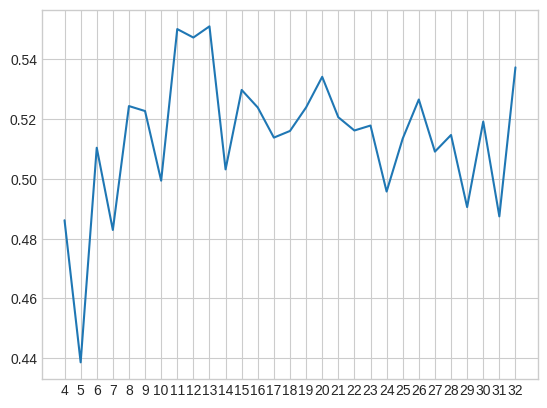

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

K=5 gives the lowest coherence value. A low coherence score suggests that there is the highest difference between each topic which is the desired outcome.





In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=5)
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
coherence_lda = coherence_model_lda.get_coherence()
num_of_topics.append(5)
coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOPIC 1:Theme: Restaraunts and reviews
Related Words:order, wait, food, pizza, restaraunt, drink, service, table

TOPIC 2: Theme: Mexican food positive review
Related words:mexican, salsa,taco,coffee, enjoy, fresh,amazing, love, good delicious

TOPIC 3: Theme: Asian resaraunts review
Related words: chicken, rice, sushi, spicy,flavor, fry, noodle, roll, soup, sauce, fresh

TOPIC 4: Theme: Positive Feedback
Related words:good, friendly, love, nice, favorite, recommend, amazing

TOPIC 5: Theme: Dessert
Related words: cheesecake, baklava,tiramisu, mango, dessert,pear, prickly, gyoza


In [ ]:
one_star_reviews = data[data['stars'] == 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
documents = []
for index, row in one_star_reviews.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(2,31):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-8985d06e50f9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


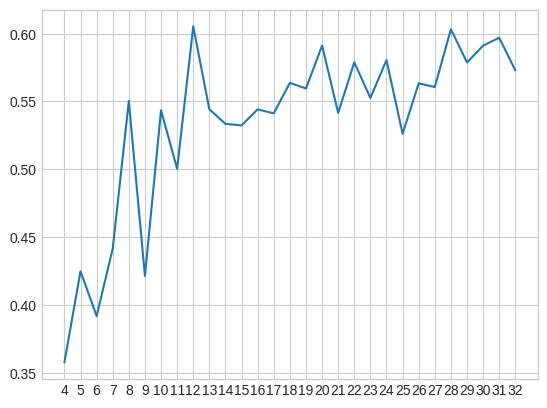

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

K=4, has the lowest coherence value. Hence, it is te most attractive as it will have distinct topics that indicates better topic modeling.

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=4)
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
coherence_lda = coherence_model_lda.get_coherence()
coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOPIC 1: Theme: Bad service at pizza place  
Related words:pizza,rude,bad,wait,food

TOPIC 2: Theme: Asian and mexican food bad review  
Related words: food, chicken, eat, taco, burrito, meat, sauce, bad cold, small

TOPIC 3: Theme: Bad review about Cheesecake factory  
Related words:Cheesecake, factory, mask, wear, employee, rude, service, responsibility

TOPIC 4: Theme: General negative reviews
Related words:wait, time, service, bad, horrible, snobby, leave

In [ ]:
five_star_reviews = data[data['stars'] == 5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
documents = []
for index, row in five_star_reviews.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(2,31):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-8985d06e50f9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


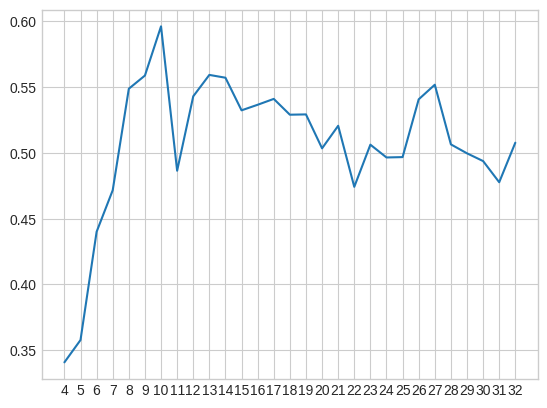

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

K=4, has the lowest coherence value. Hence, it is the most attractive as it will have distinct topics that indicates better topic modeling.

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=4)
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
coherence_lda = coherence_model_lda.get_coherence()
coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOPIC 1: Theme: Good reviews about restaraunts in Tuscon   
Related words:great, good, love, amazing, Tuscon, delicious, recommend, friendly

TOPIC 2: Theme: Good reviews about Korean restaraunts    
Related words: Korean, sushi, roll, fresh, try, good, great, amazing love

TOPIC 3: Theme: Good reviews about Japanese restaraunts  
Related words:pho, north, seis,japanese, ramen, bubble,sushi, tempura, chillie,love, great, good, service

TOPIC 4: Theme: Good reviews about BBQ restaraunts  
Related words:BBQ, brisket, tikka, Banh, chilli, masala, good, best, trreasure, amazing

In [ ]:
# Assuming lda_model and corpus_tfidf are already defined

# Define the topic number you are interested in
topic_of_interest = 1  # replace with your chosen topic number

# Find the documents for the selected topic
selected_documents = []
for i, row in enumerate(lda_model[corpus_tfidf]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    if row[0][0] == topic_of_interest:
        selected_documents.append(documents[i])

# Displaying some of the selected documents
for doc in selected_documents[:5]:  # Adjust the slice for how many examples you want to show
    print(doc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pandemic pit stop to have an ice cream only plain Sundae Limited menu was written on the screens outside So no unpleasant surprise
Cashier was wearing gloves and mask, and him holding the item was good since he did not hold it with the lid 
There were only three customers at 8:15 pm
Location is a bomb Parking and access easy Great visibility 
No pictures tonight soo
In town after a long weekend of hiking and camping The burgers were well seasoned and cooked as ordered with lots of flavor 
Waitresses were super friendly and attentive Was expecting more of a bar a scene but was pleasantly surprised for a relaxing dinner with locals
Estrell hotel 

Didn t halve a room Booked but Ismael really looked out and got us a room with no worries And made our stay a pleasurable And would do business again Thank you Ismael for the great hospitality
Such a great first experience here I have been to Phoenix locations and was so excited when Postino opened in Tucson With COVID and everything happening,

In [ ]:
# Assuming lda_model and corpus_tfidf are already defined

# Define the topic number you are interested in
topic_of_interest = 2  # replace with your chosen topic number

# Find the documents for the selected topic
selected_documents = []
for i, row in enumerate(lda_model[corpus_tfidf]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    if row[0][0] == topic_of_interest:
        selected_documents.append(documents[i])

# Displaying some of the selected documents
for doc in selected_documents[:5]:  # Adjust the slice for how many examples you want to show
    print(doc)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


I was lucky enough to go to the soft opening and let me tell you IT IS SO GOOD Only beer and wine with so many different modern italian appetizers, bruschettas, paninis, and salads Please do yourself a favor and visit this place It is so good and the staff was so friendly I look forward to enjoying this restaurant in the future
I ve gone to claim Jumpers all over the US and they never disappoint this location is no different they cook their food very well and they have excellent desserts and the service at which they deliver everything is impeccable I would absolutely recommend this restaurant for a quality meal Best place in Tucson to take your wife out for dinner hands down
This is the definition of a great family-run breakfast and lunch spot We had a good breakfast and enjoyed it so much that we returned the next day for breakfast sandwiches to go Loved the biscuits Very warm and friendly service and the prices are extremely reasonable for the quality of the food Would definitely re

In [ ]:
# Assuming lda_model and corpus_tfidf are already defined

# Define the topic number you are interested in
topic_of_interest = 3 # replace with your chosen topic number

# Find the documents for the selected topic
selected_documents = []
for i, row in enumerate(lda_model[corpus_tfidf]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    if row[0][0] == topic_of_interest:
        selected_documents.append(documents[i])

# Displaying some of the selected documents
for doc in selected_documents[:5]:  # Adjust the slice for how many examples you want to show
    print(doc)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This place has not only never let me down, but it has amazed me everytime I eat there Try the Jalepeno Cilantro Hummus It is tge beat Hummus I ve ever had Hands down
Best BBQ from a bbq joint I ve had in years Gumbo was excellent also Ate way too much
LOVE the Japanese Pork Udon soup SO YUM
Patrick made our night The food was phenomenal, we had the Barg, and the lamb can t pronounce itcan t forget it Baklava and ice cream for desert This place is a treasure
Changed their name from Sentinel Peak to Firetruck Brewing Same great neighborhood bar and grill, same great owners, same great service with just a new name Nikki, Nate and Tammy are kick ass bartenders and Erin kills the table service Go therenow


In general, the topics mentioned in one-star and five-star reviews are about the different cuisines and their experiences in each.The good reviews praised the service time of the employees majorly. The bad reviews also focused on rude behaviours from the employees primarily. Hence, good, friendly and quick service is what customers want.

I have used GenAI tools for this assignment and I haven't worked together with anyone for this assignment.

In [ ]:
from google.colab import drive
 drive.mount('/content/drive')

 import pandas as pd
 data = pd.read_csv('/content/drive/MyDrive/CIS_509/IMDBLarge.csv', nrows=1000)
 data